In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc
import matplotlib as mpl
from highlight_text import fig_text

# Pedri's percentile data

In [2]:
category = ["Assists","Dribbles Completed","Pro Pass Rec","Progressive Passes","Shots Total","Goals","xA","npxG+xA","Blocks","Pass comp","Prog carries","Pressures"]
values = [74,76,95,66,54,9,89,92,93,80,65,95]
other = [23,23,45,2,3,2]
ser = pd.Series(data=values,index=category)
df = pd.DataFrame(values, index =category,columns =['Stat'])

In [3]:
def colors(row):
    if row.Stat > 80:
        return "Great"
    elif row.Stat < 20:
        return "Poor"
    else:
        return "Normal"

tt = df.apply(colors, axis='columns')
df["Result"] = tt.values

In [4]:
df

,Stat,Result
Assists,74,Normal
Dribbles Completed,76,Normal
Pro Pass Rec,95,Great
Progressive Passes,66,Normal
Shots Total,54,Normal
Goals,9,Poor
xA,89,Great
npxG+xA,92,Great
Blocks,93,Great
Pass comp,80,Normal


In [5]:
def plot_color(row):
    if row.Stat > 80:
        return "green"
    elif row.Stat < 20:
        return "crimson"
    else:
        return "gray"

tt1 = df.apply(plot_color, axis='columns')
df["Color"] = tt1.values

In [6]:
df

,Stat,Result,Color
Assists,74,Normal,gray
Dribbles Completed,76,Normal,gray
Pro Pass Rec,95,Great,green
Progressive Passes,66,Normal,gray
Shots Total,54,Normal,gray
Goals,9,Poor,crimson
xA,89,Great,green
npxG+xA,92,Great,green
Blocks,93,Great,green
Pass comp,80,Normal,gray


In [7]:
def plot_color(row):
    if row.Stat > 80:
        return "white"
    elif row.Stat < 20:
        return "white"
    else:
        return "black"

tt2 = df.apply(plot_color, axis='columns')
df["Color_annot"] = tt2.values

In [8]:
df

,Stat,Result,Color,Color_annot
Assists,74,Normal,gray,black
Dribbles Completed,76,Normal,gray,black
Pro Pass Rec,95,Great,green,white
Progressive Passes,66,Normal,gray,black
Shots Total,54,Normal,gray,black
Goals,9,Poor,crimson,white
xA,89,Great,green,white
npxG+xA,92,Great,green,white
Blocks,93,Great,green,white
Pass comp,80,Normal,gray,black


In [9]:
df.reset_index(inplace=True)
df

,index,Stat,Result,Color,Color_annot
0,Assists,74,Normal,gray,black
1,Dribbles Completed,76,Normal,gray,black
2,Pro Pass Rec,95,Great,green,white
3,Progressive Passes,66,Normal,gray,black
4,Shots Total,54,Normal,gray,black
5,Goals,9,Poor,crimson,white
6,xA,89,Great,green,white
7,npxG+xA,92,Great,green,white
8,Blocks,93,Great,green,white
9,Pass comp,80,Normal,gray,black


# Total shots

Text(1, 51.08, 'Shots Total')

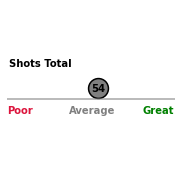

In [10]:
fig,ax = plt.subplots(figsize = (3,3))
plot1 = df[df["index"]=="Shots Total"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,100])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Text
ax.annotate(text1, (plot1.iloc[0]['Stat']-3.9,50.25),fontweight="bold",color=color_annot1)
ax.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax.annotate("Average", (37,49.50),fontweight="bold",color='gray')
ax.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

In [11]:
df[df["index"]=="Shots Total"]

,index,Stat,Result,Color,Color_annot
4,Shots Total,54,Normal,gray,black


Text(1, 51.08, 'Goals')

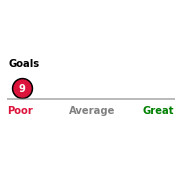

In [12]:
fig,ax = plt.subplots(figsize = (3,3))
plot2 = df[df["index"]=="Goals"]
text2 = str(plot2.iloc[0]['Stat'])
color_annot2 = plot2.iloc[0]['Color_annot']
ax.scatter(x=plot2.iloc[0]['Stat'] ,y=50.35,c=plot2.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5,alpha=1)
plt.xticks([0,50,100])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Text
ax.annotate(text2, (plot2.iloc[0]['Stat']-2.,50.25),fontweight="bold",color=color_annot2)
ax.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax.annotate("Average", (37,49.50),fontweight="bold",color='gray')
ax.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax.annotate(plot2.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

Text(0.5, 1.0, '[2,2]')

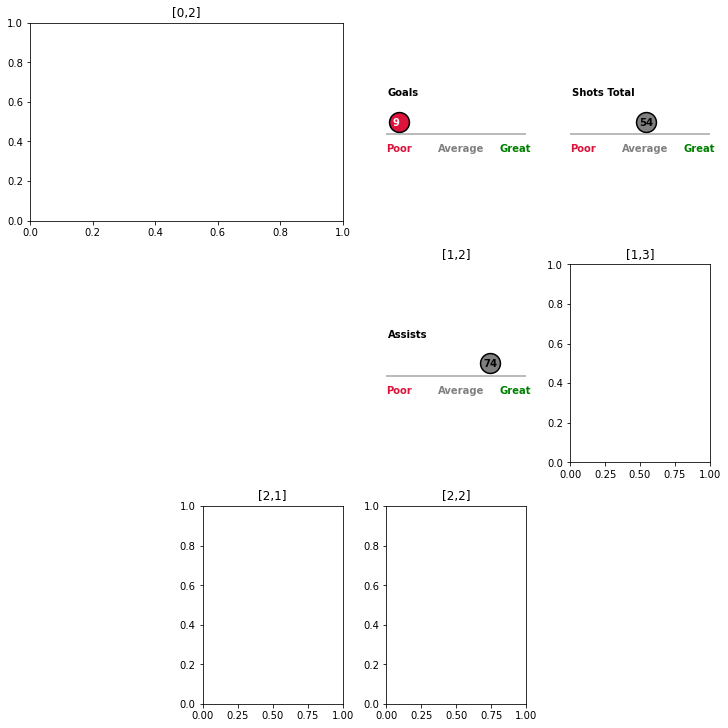

In [13]:
fig = plt.figure(figsize=(10,10),constrained_layout = True)

gs = fig.add_gridspec(nrows = 3, ncols = 4)

ax1 = fig.add_subplot(gs[0,0:2])
ax1.set_title('[0,2]')


ax3 = fig.add_subplot(gs[0,2])
plot1 = df[df["index"]=="Goals"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax3.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,100])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Text
ax3.annotate(text1, (plot1.iloc[0]['Stat']-4.9,50.25),fontweight="bold",color=color_annot1)
ax3.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax3.annotate("Average", (37,49.50),fontweight="bold",color='gray')
ax3.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax3.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax4 = fig.add_subplot(gs[0,3])


plot1 = df[df["index"]=="Shots Total"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax4.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,100])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

# Text
ax4.annotate(text1, (plot1.iloc[0]['Stat']-4.9,50.25),fontweight="bold",color=color_annot1)
ax4.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax4.annotate("Average", (37,49.50),fontweight="bold",color='gray')
ax4.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax4.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax7 = fig.add_subplot(gs[1,2])
ax7.set_title('[1,2]')

plot1 = df[df["index"]=="Assists"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax7.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,100])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.spines['bottom'].set_visible(False)

# Text
ax7.annotate(text1, (plot1.iloc[0]['Stat']-4.9,50.25),fontweight="bold",color=color_annot1)
ax7.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax7.annotate("Average", (37,49.50),fontweight="bold",color='gray')
ax7.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax7.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax8 = fig.add_subplot(gs[1,3])
ax8.set_title('[1,3]')

ax10 = fig.add_subplot(gs[2,1])
ax10.set_title('[2,1]')

ax11 = fig.add_subplot(gs[2,2])
ax11.set_title('[2,2]')

# Real Attempt

IndexError: single positional indexer is out-of-bounds

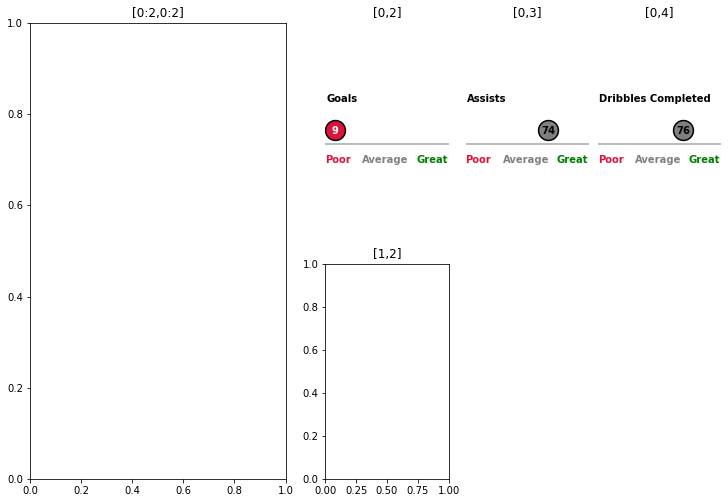

In [17]:
fig = plt.figure(figsize=(10,10),constrained_layout = True)
#plt.subplots_adjust(hspace=0)

gs = fig.add_gridspec(nrows = 3, ncols = 5)
#gs.update(wspace=0.025, hspace=0.05)

ax1 = fig.add_subplot(gs[0:2,0:2])
ax1.set_title('[0:2,0:2]')

ax2 = fig.add_subplot(gs[0,2])
ax2.set_title('[0,2]')

plot1 = df[df["index"]=="Goals"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax2.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Text
ax2.annotate(text1, (plot1.iloc[0]['Stat']-3.5,50.25),fontweight="bold",color=color_annot1)
ax2.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax2.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax2.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax2.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax3 = fig.add_subplot(gs[0,3])
ax3.set_title('[0,3]')

plot1 = df[df["index"]=="Assists"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax3.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Text
ax3.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1)
ax3.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax3.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax3.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax3.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax4 = fig.add_subplot(gs[0,4])
ax4.set_title('[0,4]')

plot1 = df[df["index"]=="Dribbles Completed"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax4.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

# Text
ax4.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1)
ax4.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax4.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax4.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax4.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax5 = fig.add_subplot(gs[1,2])
ax5.set_title('[1,2]')

plot1 = df[df["index"]=="Progressive Passes Rec"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax5.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

# Text
ax5.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1)
ax5.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax5.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax5.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax5.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')


ax6 = fig.add_subplot(gs[1,3])
ax6.set_title('[1,3]')

plot1 = df[df["index"]=="Progressive Passes"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax6.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)

# Text
ax6.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1)
ax6.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax6.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax6.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax6.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

ax7 = fig.add_subplot(gs[1,4])
ax7.set_title('[1,4]')

plot1 = df[df["index"]=="Shots Total"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax7.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=395, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.spines['bottom'].set_visible(False)

# Text
ax7.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1)
ax7.annotate("Poor", (0,49.50),fontweight="bold",color='crimson')
ax7.annotate("Average", (33,49.50),fontweight="bold",color='gray')
ax7.annotate("Great", (81,49.50),fontweight="bold",color='green')
ax7.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k')

# Other attempts

In [18]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc

In [19]:
# Entering Aleksander Isak ID link
link = "https://understat.com/player/8935"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the grouped stats data, it's the second script executed in order
strings = scripts[3].string
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [20]:
shots = pd.DataFrame(data) # Aleksander Isak shot data
# Changing data type
shots['xG'] = shots['xG'].astype('float64')
shots['X'] = shots['X'].astype('float64')
shots['Y'] = shots['Y'].astype('float64')

In [21]:
# Setting dimensions, colour, orientation of football pitch
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

In [22]:
shots['X1'] = (shots['X']/100)*105*100
shots['Y1'] = (shots['Y']/100)*68*100
# Original X and Y
shots['X'] = (shots['X']/100)*105*100
shots['Y'] = (shots['Y']/100)*68*100

# New dictionaries 
total_shots = shots[shots.columns[0]].count().tolist()
xGcum = np.round(max(np.cumsum(shots['xG'])),3).tolist()
xG_per_shot = np.round(max(np.cumsum(shots['xG']))/(shots[shots.columns[0]].count()),3).tolist()
goal = shots[shots['result']=='Goal']
shot_on_post = shots[shots['result']=='ShotOnPost']
blocked_shot = shots[shots['result']=='BlockedShot']
saved_shot = shots[shots['result']=='SavedShot']
missed_shot = shots[shots['result']=='MissedShot']
goals = goal[goal.columns[0]].count().tolist()

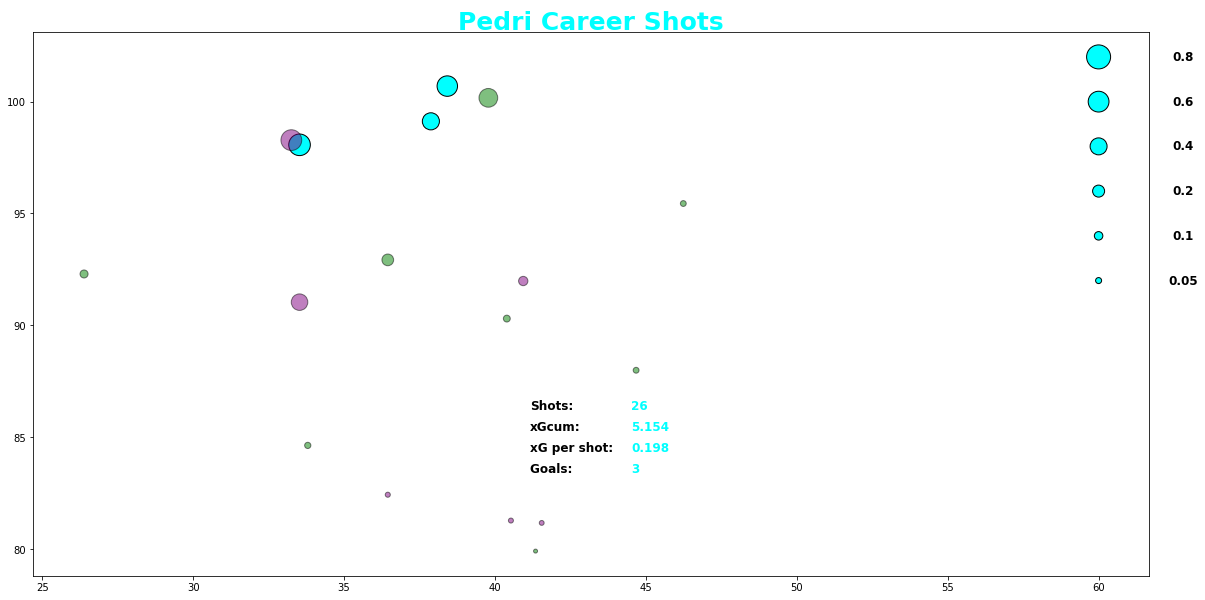

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
football_pitch(orientation="vertical",aspect="full",line_color="black",ax=ax1,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [500 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal["X1"],x=goal["Y1"],s=goal['xG']*720, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post["X1"],x=shot_on_post["Y1"],s=shot_on_post['xG']*720, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot["X1"],x=missed_shot["Y1"],s=missed_shot['xG']*720, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot["X1"],x=blocked_shot["Y1"],s=blocked_shot['xG']*720, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot["X1"],x=saved_shot["Y1"],s=saved_shot['xG']*720, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)
#legend 
# another way to do it 
#ax.legend(loc='upper center', bbox_to_anchor= (0.13, 0.87),
            #borderaxespad=0, frameon=False)
#legend = ax1.legend(loc="upper center",bbox_to_anchor= (0.14, 0.88),labelspacing=1.3,prop={'weight':'bold','size':11})
#legend.legendHandles[0]._sizes = [500]
#legend.legendHandles[1]._sizes = [500]
#legend.legendHandles[2]._sizes = [500]
#legend.legendHandles[3]._sizes = [500]
#legend.legendHandles[4]._sizes = [500]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.8, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')
# Annotation text
fig_text(0.42,0.91, s="Pedri Career Shots\n", fontsize = 25, fontweight = "bold",c='cyan')
fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots,xGcum,xG_per_shot,goals), fontsize = 12, fontweight = "bold",c='cyan')

# Here we go again

<ipython-input-75-36394f3d9e2d>:43: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


Text(1, 51.08, 'Prog carries')

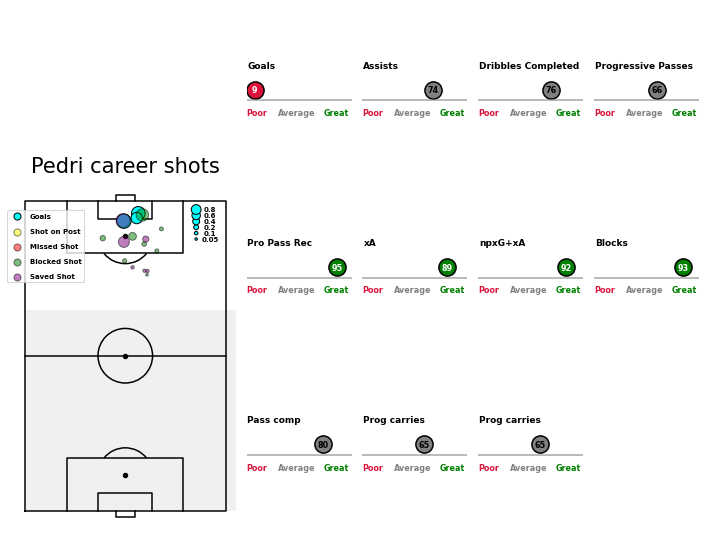

In [75]:
fig = plt.figure(figsize=(10,10),constrained_layout = True)
plt.tight_layout()
gs = fig.add_gridspec(nrows = 4, ncols = 6)

ax1 = fig.add_subplot(gs[0:4,0:2])
ax1.set_title('Pedri career shots',size=21)

football_pitch(orientation="vertical",aspect="full",line_color="black",ax=ax1,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [300 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal["X1"],x=goal["Y1"],s=goal['xG']*320, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post["X1"],x=shot_on_post["Y1"],s=shot_on_post['xG']*320, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot["X1"],x=missed_shot["Y1"],s=missed_shot['xG']*320, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot["X1"],x=blocked_shot["Y1"],s=blocked_shot['xG']*320, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot["X1"],x=saved_shot["Y1"],s=saved_shot['xG']*320, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)
#legend 

legend = ax1.legend(loc="upper center",bbox_to_anchor= (0.14, 0.92),labelspacing=1.3,prop={'weight':'bold','size':7})
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
legend.legendHandles[3]._sizes = [50]
legend.legendHandles[4]._sizes = [50]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [120 * i for i in mSize]
mx = [58,58,58,58,58,58]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 4.8, my[i], mSize[i], fontsize=7, color="black",ha="center", va="center",fontweight='bold')
# Annotation text
#fig_text(0.05,0.96, s="Pedri Career Shots\n", fontsize = 15, fontweight = "bold",c='cyan')
#fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
#fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots,xGcum,xG_per_shot,goals), fontsize = 12, fontweight = "bold",c='cyan')
plt.tight_layout()
ax2 = fig.add_subplot(gs[0,2])
plot1 = df[df["index"]=="Goals"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax2.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Text
ax2.annotate(text1, (plot1.iloc[0]['Stat']-3.5,50.25),fontweight="bold",color=color_annot1,size=8)
ax2.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax2.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax2.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax2.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)


ax3 = fig.add_subplot(gs[0,3])
plot1 = df[df["index"]=="Assists"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax3.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Text
ax3.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax3.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax3.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax3.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax3.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax4 = fig.add_subplot(gs[0,4])
plot1 = df[df["index"]=="Dribbles Completed"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax4.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

# Text
ax4.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax4.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax4.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax4.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax4.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax5 = fig.add_subplot(gs[1,2])
plot1 = df[df["index"]=="Pro Pass Rec"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax5.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

# Text
ax5.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax5.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax5.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax5.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax5.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax6 = fig.add_subplot(gs[0,5])
plot1 = df[df["index"]=="Progressive Passes"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax6.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)

# Text
ax6.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax6.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax6.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax6.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax6.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax7 = fig.add_subplot(gs[1,3])
plot1 = df[df["index"]=="xA"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax7.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.spines['bottom'].set_visible(False)

# Text
ax7.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax7.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax7.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax7.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax7.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax8 = fig.add_subplot(gs[1,4])
plot1 = df[df["index"]=="npxG+xA"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax8.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['bottom'].set_visible(False)

# Text
ax8.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax8.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax8.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax8.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax8.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax9 = fig.add_subplot(gs[1,5])
plot1 = df[df["index"]=="Blocks"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax9.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

# Text
ax9.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax9.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax9.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax9.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax9.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax10 = fig.add_subplot(gs[2,2])
plot1 = df[df["index"]=="Pass comp"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax10.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['left'].set_visible(False)
ax10.spines['bottom'].set_visible(False)

# Text
ax10.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax10.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax10.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax10.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax10.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax11 = fig.add_subplot(gs[2,3])
plot1 = df[df["index"]=="Prog carries"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax11.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.spines['left'].set_visible(False)
ax11.spines['bottom'].set_visible(False)

# Text
ax11.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax11.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax11.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax11.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax11.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax12 = fig.add_subplot(gs[2,4])
plot1 = df[df["index"]=="Prog carries"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax12.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['left'].set_visible(False)
ax12.spines['bottom'].set_visible(False)

# Text
ax12.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax12.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax12.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax12.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax12.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

# Very real attempt

<ipython-input-78-aed89f68df3f>:43: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


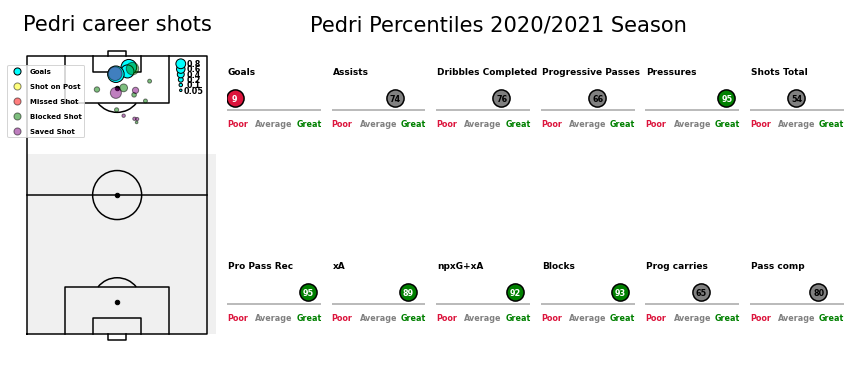

In [78]:
fig = plt.figure(figsize=(12,11),constrained_layout = True)
plt.tight_layout()
gs = fig.add_gridspec(nrows = 4, ncols = 8)

ax1 = fig.add_subplot(gs[0:2,0:2])
ax1.set_title('Pedri career shots',size=21)

football_pitch(orientation="vertical",aspect="full",line_color="black",ax=ax1,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [420 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal["X1"],x=goal["Y1"],s=goal['xG']*420, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post["X1"],x=shot_on_post["Y1"],s=shot_on_post['xG']*320, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot["X1"],x=missed_shot["Y1"],s=missed_shot['xG']*320, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot["X1"],x=blocked_shot["Y1"],s=blocked_shot['xG']*320, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot["X1"],x=saved_shot["Y1"],s=saved_shot['xG']*320, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)
#legend 

legend = ax1.legend(loc="upper center",bbox_to_anchor= (0.14, 0.92),labelspacing=1.3,prop={'weight':'bold','size':7})
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
legend.legendHandles[3]._sizes = [50]
legend.legendHandles[4]._sizes = [50]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [120 * i for i in mSize]
mx = [58,58,58,58,58,58]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 4.8, my[i], mSize[i], fontsize=8, color="black",ha="center", va="center",fontweight='bold')
# Annotation text
#fig_text(0.05,0.96, s="Pedri Career Shots\n", fontsize = 15, fontweight = "bold",c='cyan')
#fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
#fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots,xGcum,xG_per_shot,goals), fontsize = 12, fontweight = "bold",c='cyan')
plt.tight_layout()
ax2 = fig.add_subplot(gs[0,2])
plot1 = df[df["index"]=="Goals"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax2.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Text
ax2.annotate(text1, (plot1.iloc[0]['Stat']-3.5,50.25),fontweight="bold",color=color_annot1,size=8)
ax2.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax2.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax2.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax2.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)


ax3 = fig.add_subplot(gs[0,3])
plot1 = df[df["index"]=="Assists"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax3.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Text
ax3.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax3.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax3.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax3.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax3.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax4 = fig.add_subplot(gs[0,4])
plot1 = df[df["index"]=="Dribbles Completed"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax4.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

# Text
ax4.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax4.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax4.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax4.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax4.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax5 = fig.add_subplot(gs[1,2])
plot1 = df[df["index"]=="Pro Pass Rec"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax5.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

# Text
ax5.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax5.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax5.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax5.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax5.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax6 = fig.add_subplot(gs[0,5])
plot1 = df[df["index"]=="Progressive Passes"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax6.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)

# Text
ax6.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax6.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax6.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax6.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax6.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax7 = fig.add_subplot(gs[1,3])
plot1 = df[df["index"]=="xA"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax7.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.spines['bottom'].set_visible(False)

# Text
ax7.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax7.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax7.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax7.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax7.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax8 = fig.add_subplot(gs[1,4])
plot1 = df[df["index"]=="npxG+xA"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax8.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['bottom'].set_visible(False)

# Text
ax8.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax8.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax8.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax8.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax8.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax9 = fig.add_subplot(gs[1,5])
plot1 = df[df["index"]=="Blocks"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax9.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

# Text
ax9.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax9.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax9.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax9.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax9.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax10 = fig.add_subplot(gs[1,7])
plot1 = df[df["index"]=="Pass comp"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax10.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['left'].set_visible(False)
ax10.spines['bottom'].set_visible(False)

# Text
ax10.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax10.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax10.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax10.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax10.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax11 = fig.add_subplot(gs[0,6])
plot1 = df[df["index"]=="Pressures"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax11.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.spines['left'].set_visible(False)
ax11.spines['bottom'].set_visible(False)

# Text
ax11.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax11.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax11.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax11.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax11.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax12 = fig.add_subplot(gs[1,6])
plot1 = df[df["index"]=="Prog carries"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax12.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['left'].set_visible(False)
ax12.spines['bottom'].set_visible(False)

# Text
ax12.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax12.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax12.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax12.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax12.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)

ax13 = fig.add_subplot(gs[0,7])
plot1 = df[df["index"]=="Shots Total"]
text1 = str(plot1.iloc[0]['Stat'])
color_annot1 = plot1.iloc[0]['Color_annot']
ax13.scatter(x=plot1.iloc[0]['Stat'] ,y=50.35,c=plot1.Color , edgecolor='black',s=295, label="Inter",linewidths=1.5)
plt.xticks([0,50,110])
plt.axhline(y=50, color='gray', linestyle='-',alpha=0.7)
plt.axis('off')

# Removing spines
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)
ax13.spines['left'].set_visible(False)
ax13.spines['bottom'].set_visible(False)

# Text
ax13.annotate(text1, (plot1.iloc[0]['Stat']-5.9,50.25),fontweight="bold",color=color_annot1,size=8)
ax13.annotate("Poor", (0,49.50),fontweight="bold",color='crimson',size=8)
ax13.annotate("Average", (33,49.50),fontweight="bold",color='gray',size=8)
ax13.annotate("Great", (81,49.50),fontweight="bold",color='green',size=8)
ax13.annotate(plot1.iloc[0]['index'],(1,51.08),fontweight="bold",color='k',size=9)


# Final text
fig_text(0.37,.97, s="Pedri Percentiles 2020/2021 Season", fontsize = 21,color="k")

# Saving the figure

fig.savefig('Pedri percentile rankings.png')